### Stroke Prediction

Dataset: [Stroke Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Dataset Description:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This Dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

|     Features     |     Data Type     |     Description     |
|------------------|-------------------|---------------------|
|        Id        |        Int        |  Uniqie identifier patient |
|       gender     |       String      | "Male", "Female" or "Other" |
|   hypertension   |        Int        | 0 if the patient does not have hypertension, 1 if the patient has hypertension |
|   heart_disease  |        Int        | 0 if the patient does not have any heart disease, 1 if the patient has a heart disease |
|   ever_married   |       String      | "No" or "Yes" |
|    work_type     |       String      | "children", "Gov_jov","Never_worked", "Private", or "Self-employed" | 
|  residence_type  |       String      | "Rural" or "Urban" |
|avg_glucode_level |       Float       | average glucose level in blood |
|        bmi       |       Float       | body mass index |
|  smoking_status  |       String      | "formely smoked", "never smoked", "smokes" or "Unknows"|
|      stroke      |       Int         | 1 if the patient had a stroke or 0 if not | 

Note: "Unknown" in smoking status means that the information is unavailable for this patient

Purpose:
Performing Exploratory Data Analysis (EDA) to discover insights from the data and identify problems in the data. Processing data to improve the dataset so that it can be used to train machine learning models to predict stroke base on features.



# Preparation

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
Data=pd.read_csv('./Dataset/healthcare-dataset-stroke-data.csv')
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA (Exploratory Data Analysis)

## Data Understanding

In [ ]:
 Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
Data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
Duplicate=Data.duplicated().sum()
print("Sum Of Duplicate Data:",Duplicate)

Sum Of Duplicate Data: 0


In [ ]:
row, column=Data.shape
print("Sum Of Column:", column)
print("Sum Of Row:", row)

Sum Of Column: 12
Sum Of Row: 5110


## Visualization

### Barchart of Patient's Gender

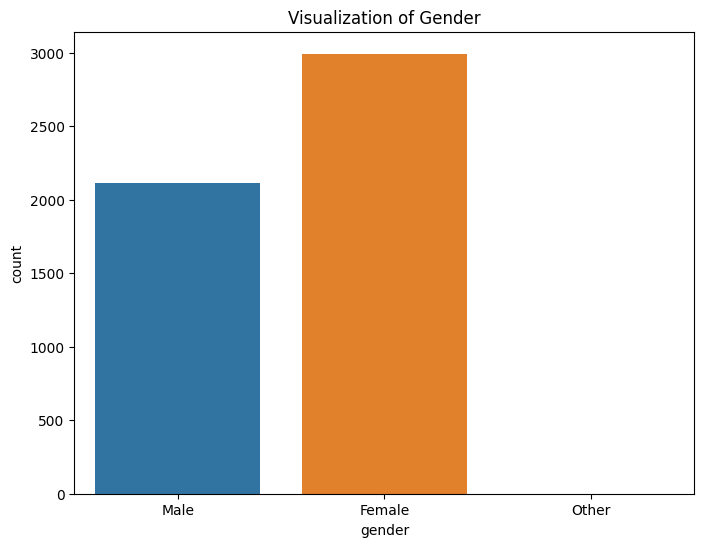

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='gender')
plt.title('Visualization of Gender')
plt.show()

### Pie Chart of Patient`s Smoking Status

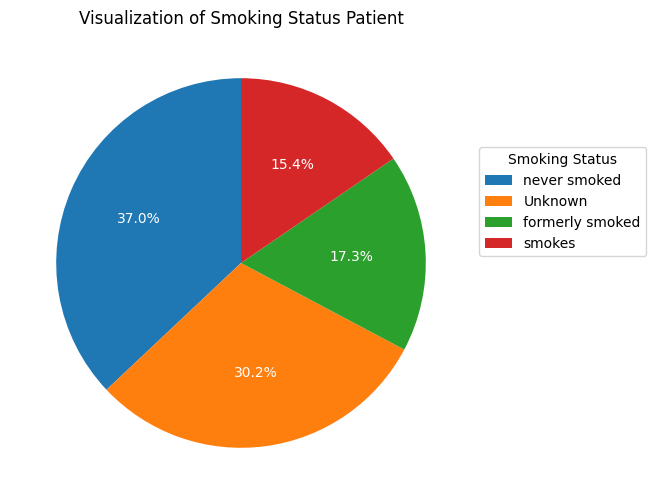

In [ ]:
count_smoking=Data['smoking_status'].value_counts()
plt.figure(figsize=(6,6))
wedges,texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization of Smoking Status Patient')
plt.legend(wedges, count_smoking.index, title="Smoking Status", loc="lower left", bbox_to_anchor=(1,0.5))

### Bar Chart of Patient`s Hypertension Status

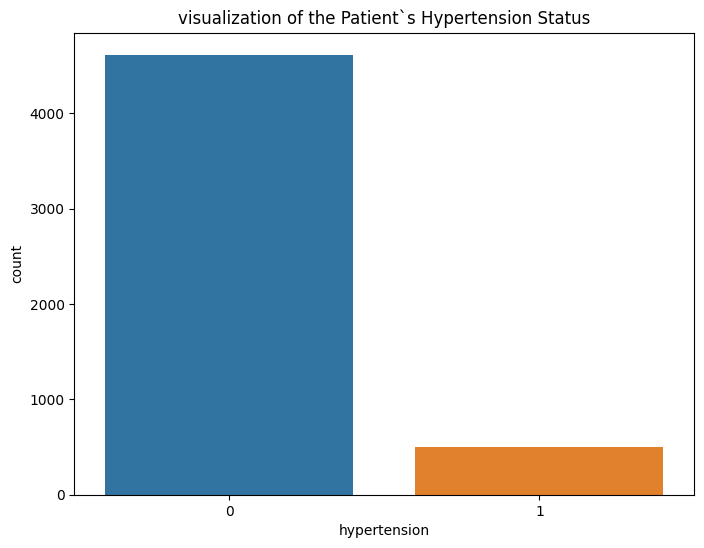

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='hypertension')
plt.title('visualization of the Patient`s Hypertension Status')
plt.show()

### Bar Chart of Patient`s Heart Disease Status

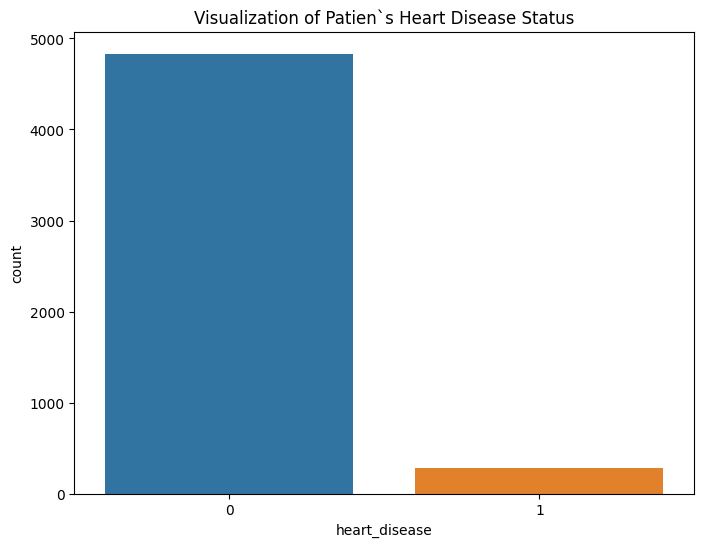

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='heart_disease')
plt.title('Visualization of Patien`s Heart Disease Status')
plt.show()

### Bar chart of Patient`s Ever Married Status

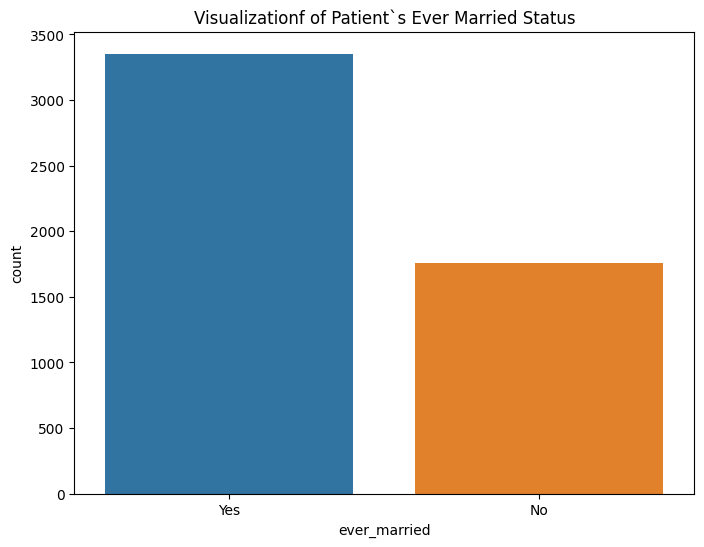

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='ever_married')
plt.title('Visualizationf of Patient`s Ever Married Status')
plt.show()

### Bar chart of Patient`s Resident Type

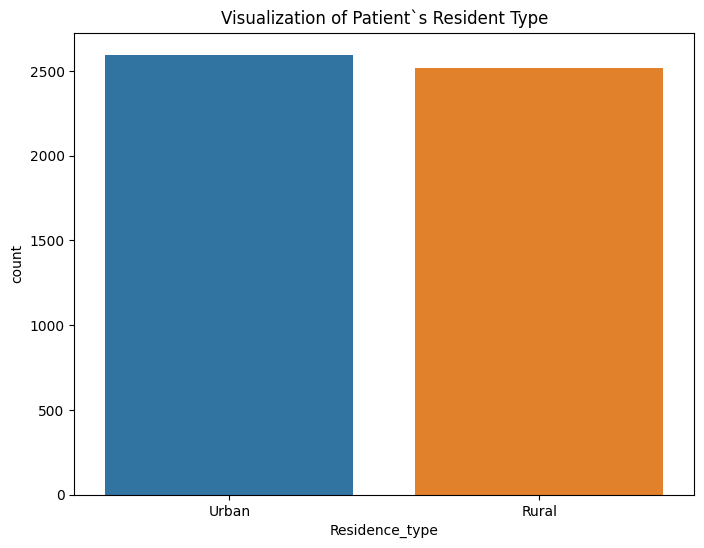

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='Residence_type')
plt.title('Visualization of Patient`s Resident Type')
plt.show()

### Bar chart of Patient`s Stroke Status

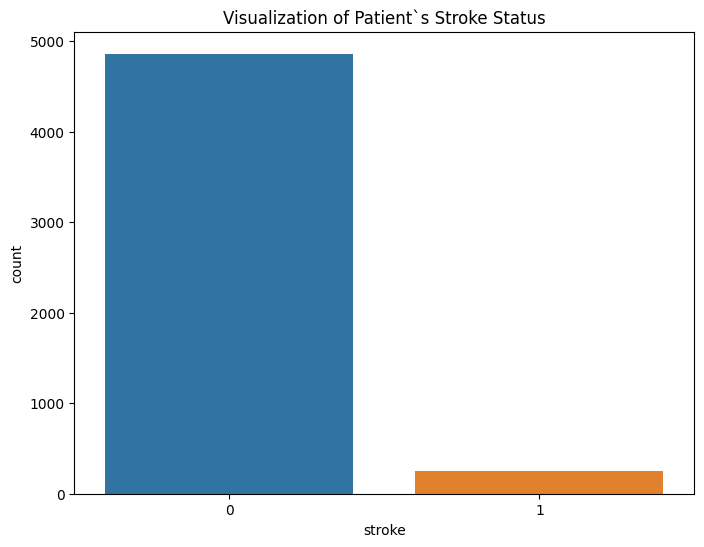

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='stroke')
plt.title('Visualization of Patient`s Stroke Status')
plt.show()

### Pie Chart of Patient`s Work Type

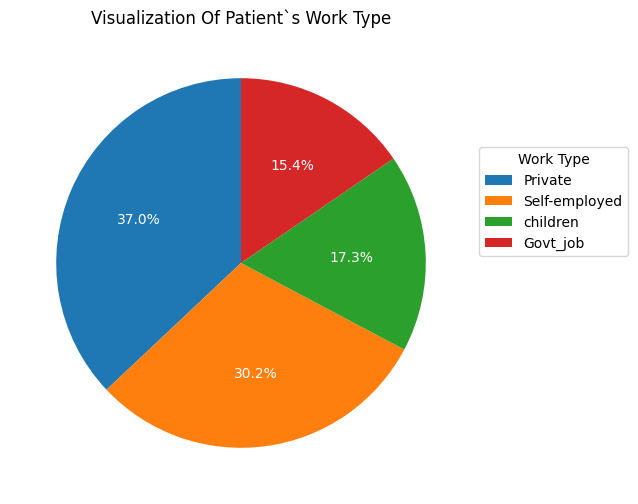

In [ ]:
count_work=Data['work_type'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)
plt.title('Visualization Of Patient`s Work Type')
plt.legend(wedges, count_work.index, title='Work Type', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Boxplot of Numerical Category

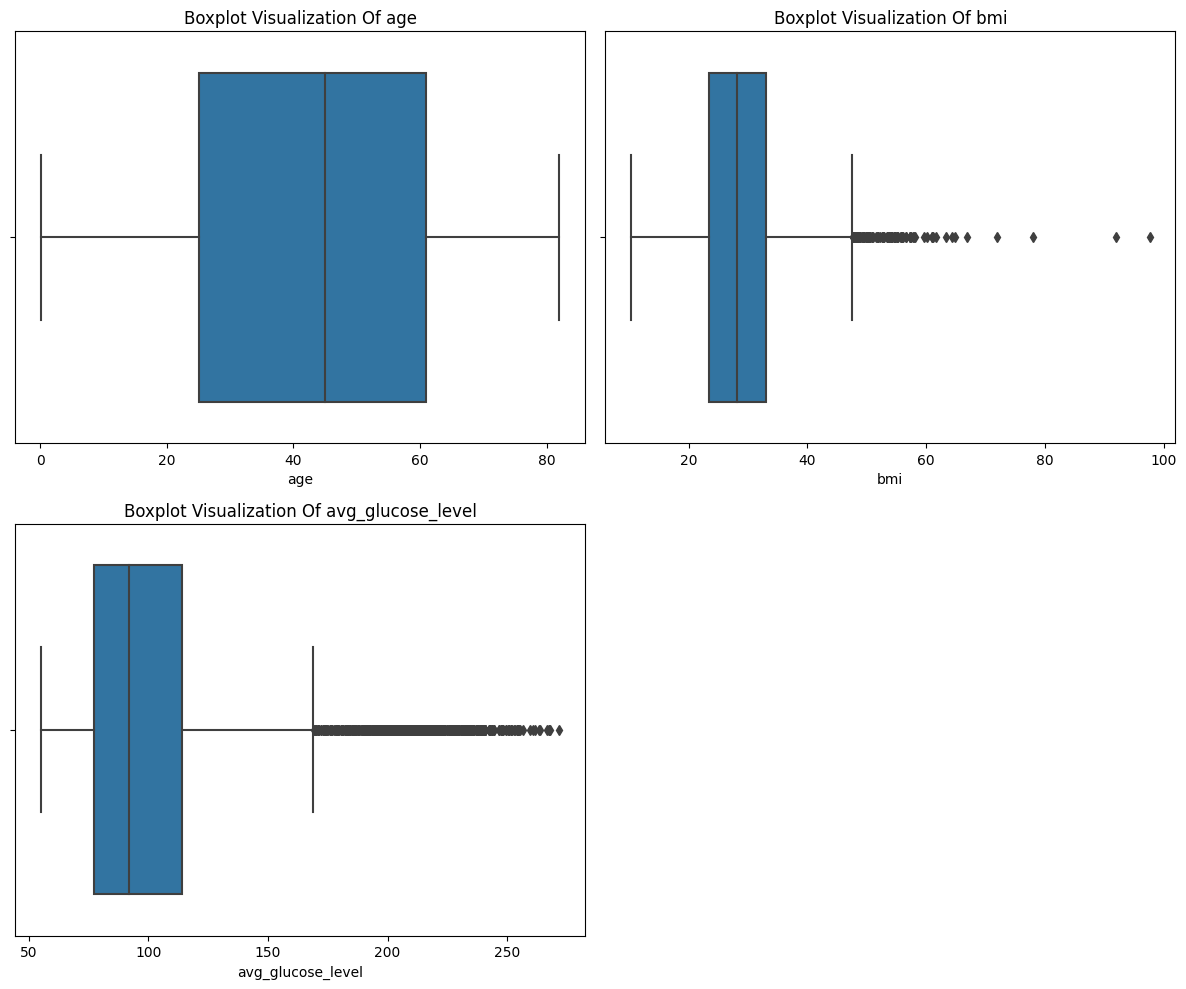

In [ ]:
num_category=['age','bmi','avg_glucose_level']
fig, axs=plt.subplots(2,2, figsize=(12,10))
axs=axs.flatten()

for i, feature in enumerate(num_category):
    sns.boxplot(data=Data, x=feature, ax=axs[i])
    axs[i].set_title(f'Boxplot Visualization Of {feature}')
    axs[i].set_xlabel(feature)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Histogram of Numerical Column

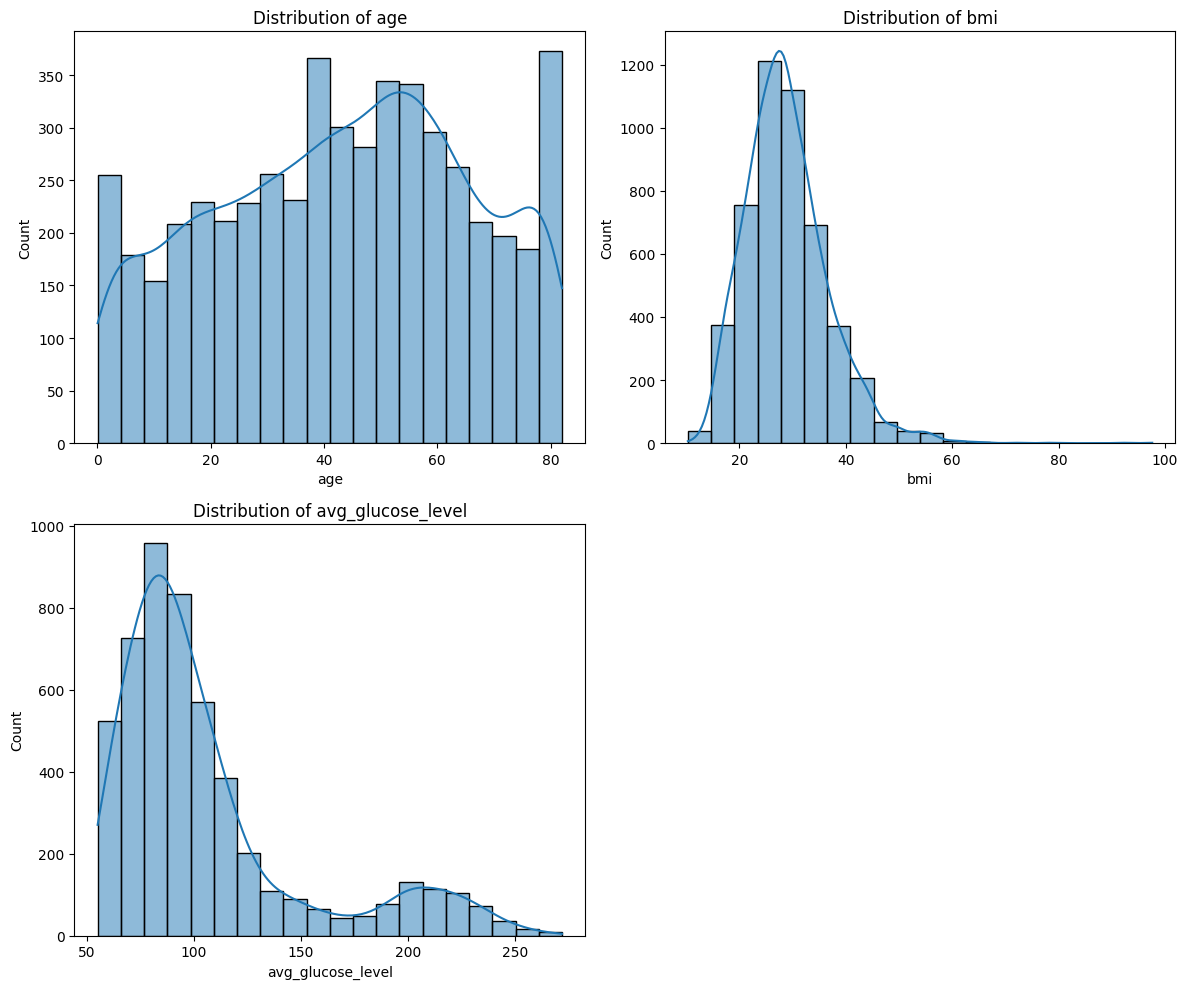

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,10))
axs=axs.flatten()
for i, feature in enumerate(num_category):
    sns.histplot(Data[feature], bins=20, kde=True, edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    plt.ylabel('Count')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Comparison of Patient`s Data VS Stroke Status

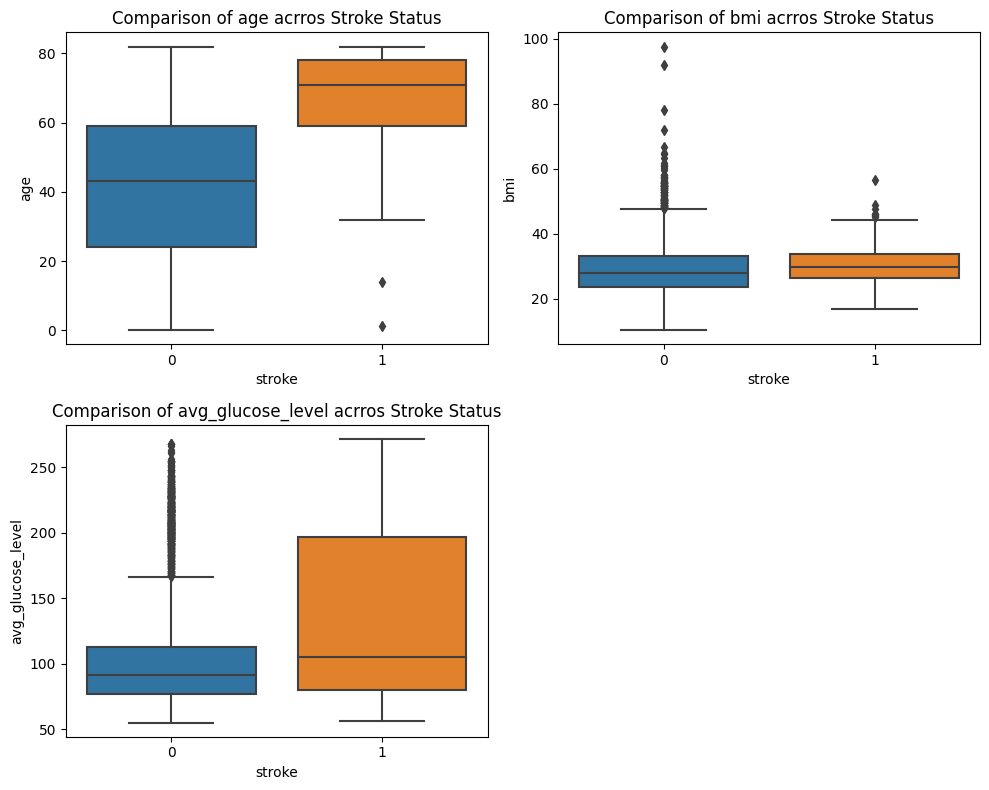

In [ ]:
Patient_Data=['age','bmi','avg_glucose_level']
fig, axs=plt.subplots(2,2, figsize=(10,8))
axs=axs.flatten()
for i, col in enumerate(Patient_Data):
    sns.boxplot(data=Data, x='stroke', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} acrros Stroke Status')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Comparison of Patient`s Data VS Hypertension Status

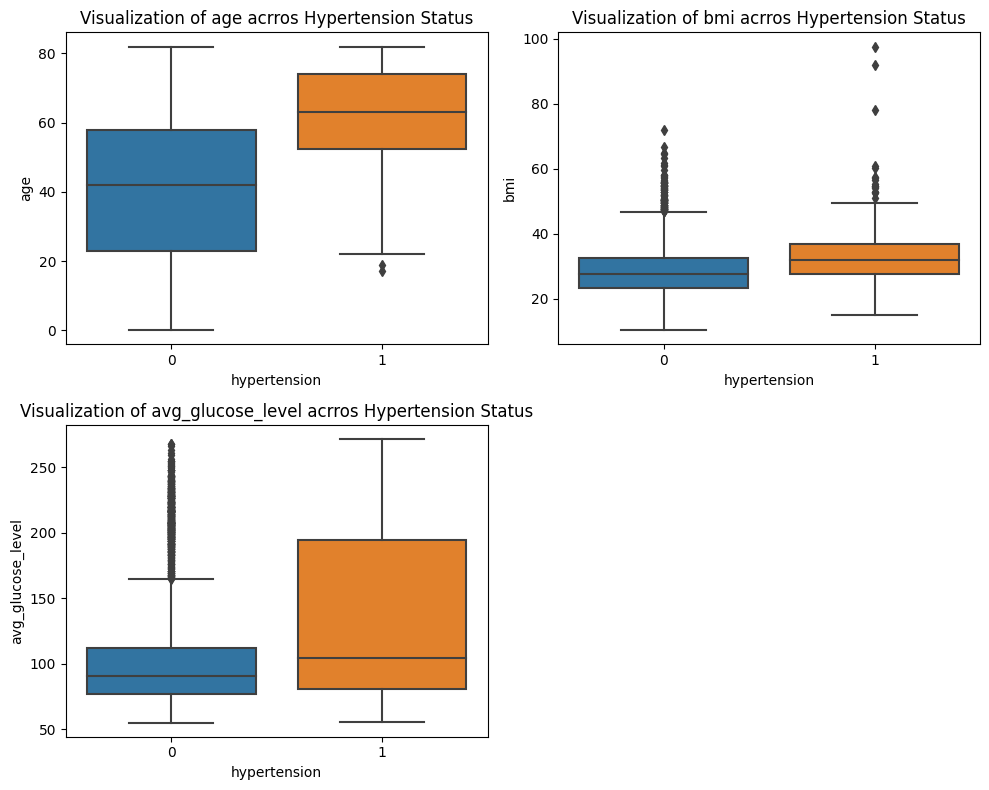

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(10,8))
axs=axs.flatten()
for i, feature in enumerate(Patient_Data):
    sns.boxplot(data=Data, x='hypertension', y=feature, ax=axs[i])
    axs[i].set_title(f'Visualization of {feature} acrros Hypertension Status')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Comparison of Patient`s Data VS Heart Disease Status

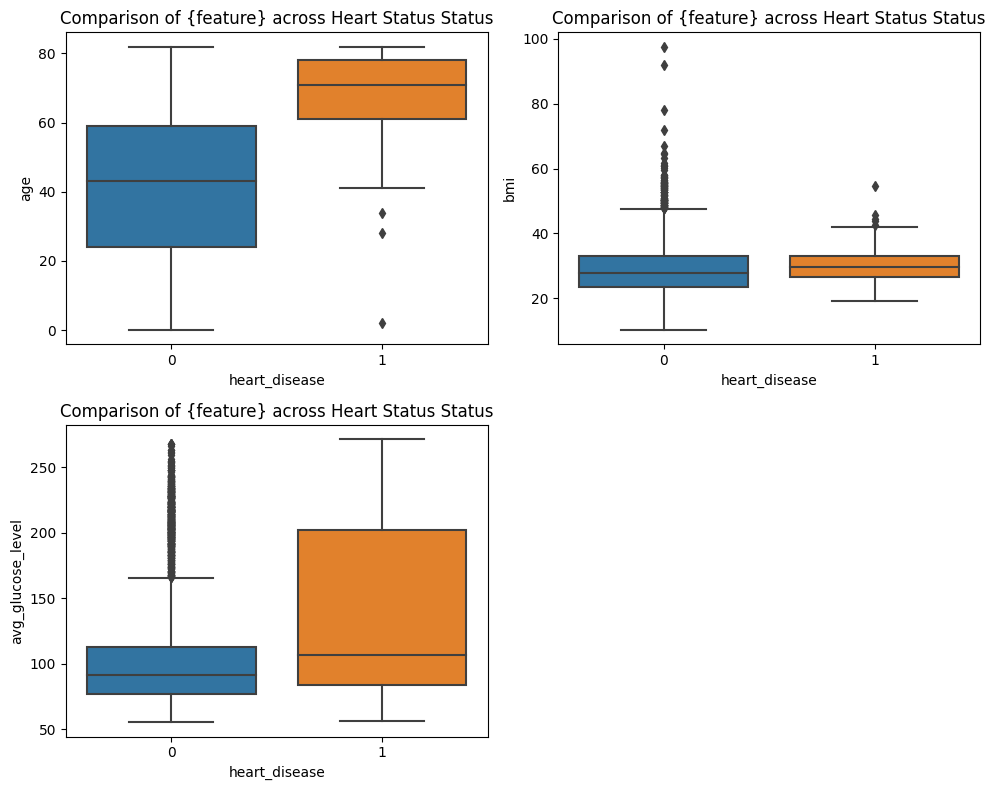

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(10,8))
axs=axs.flatten()
for i, feature in enumerate(Patient_Data):
    sns.boxplot(data=Data, x='heart_disease', y=feature, ax=axs[i])
    axs[i].set_title('Comparison of {feature} across Heart Status Status')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### Boxplot of Categorical Feature VS Stroke Status

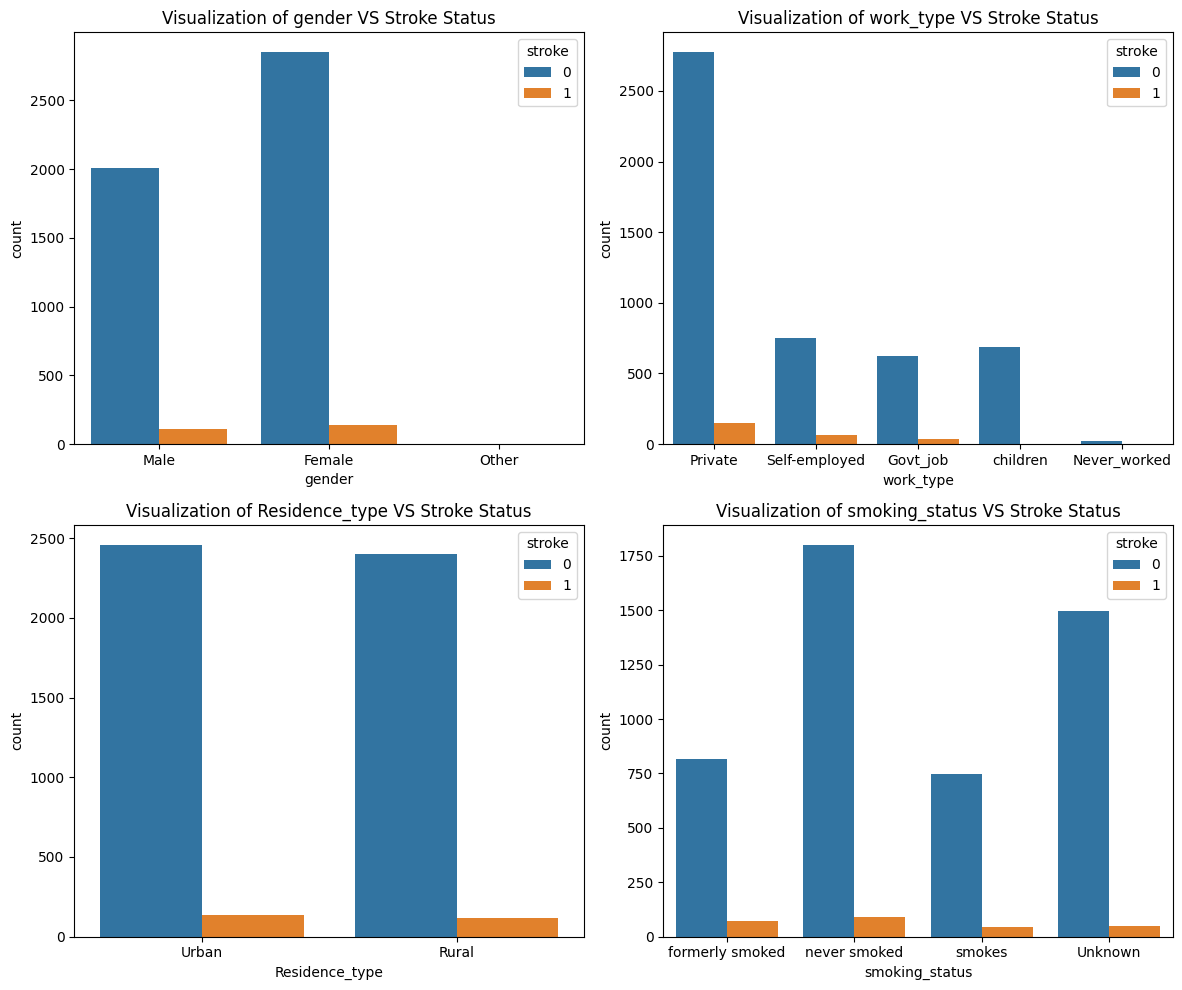

In [ ]:
Patient_status=['gender','work_type','Residence_type','smoking_status']
fig, axs=plt.subplots(2,2, figsize=(12,10))
axs=axs.flatten()
for i, feature in enumerate(Patient_status):
    sns.countplot(data=Data, x=feature, hue='stroke', ax=axs[i])
    axs[i].set_title(f'Visualization of {feature} VS Stroke Status')
    axs[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

### Boxplot of Categorical Feature VS Hypertension Status

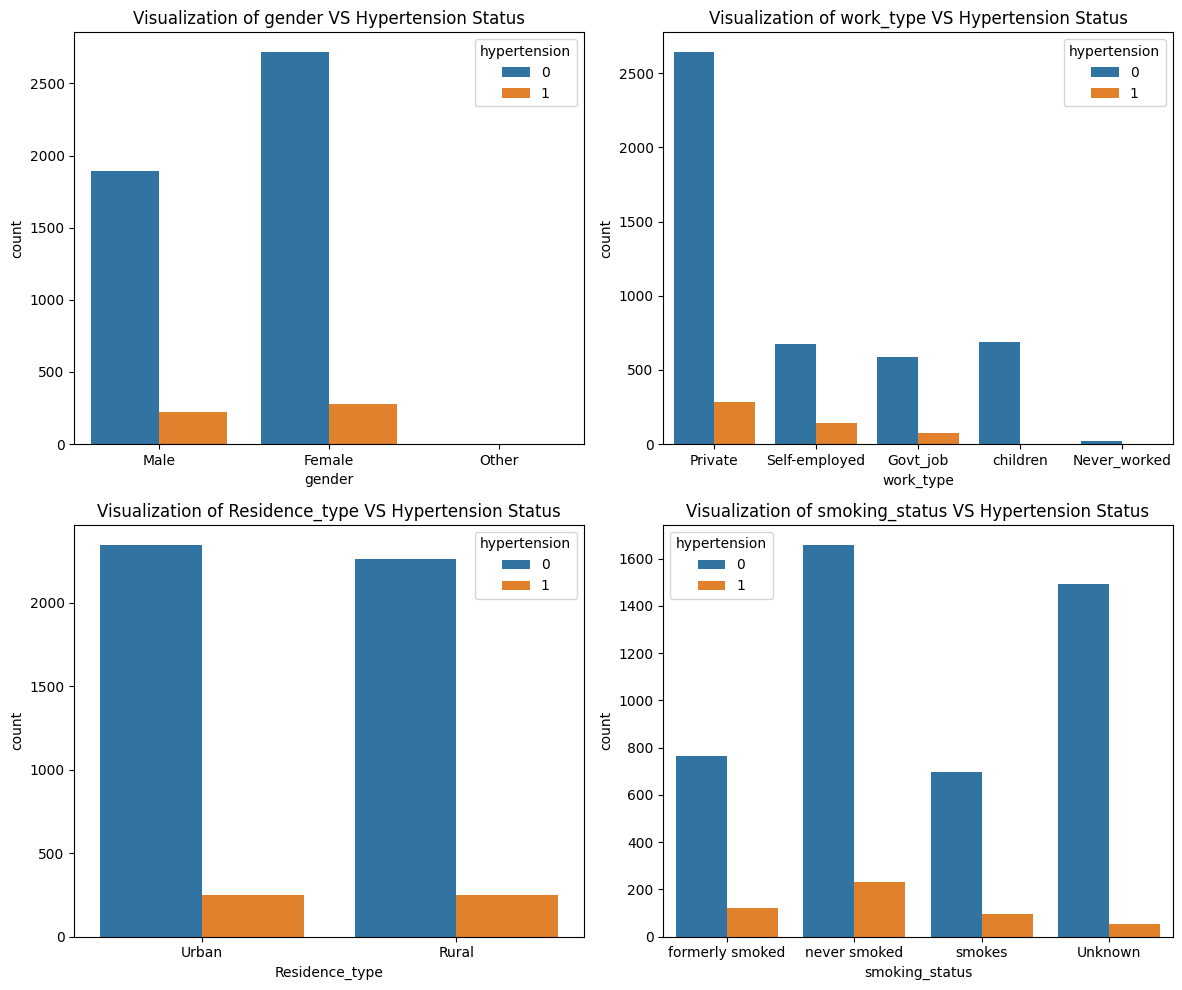

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,10))
axs=axs.flatten()
for i, feature in enumerate(Patient_status):
    sns.countplot(data=Data, x=feature, hue='hypertension', ax=axs[i])
    axs[i].set_title(f'Visualization of {feature} VS Hypertension Status')
    axs[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

### Visualization of Categorical Feature VS Heart Disease Status

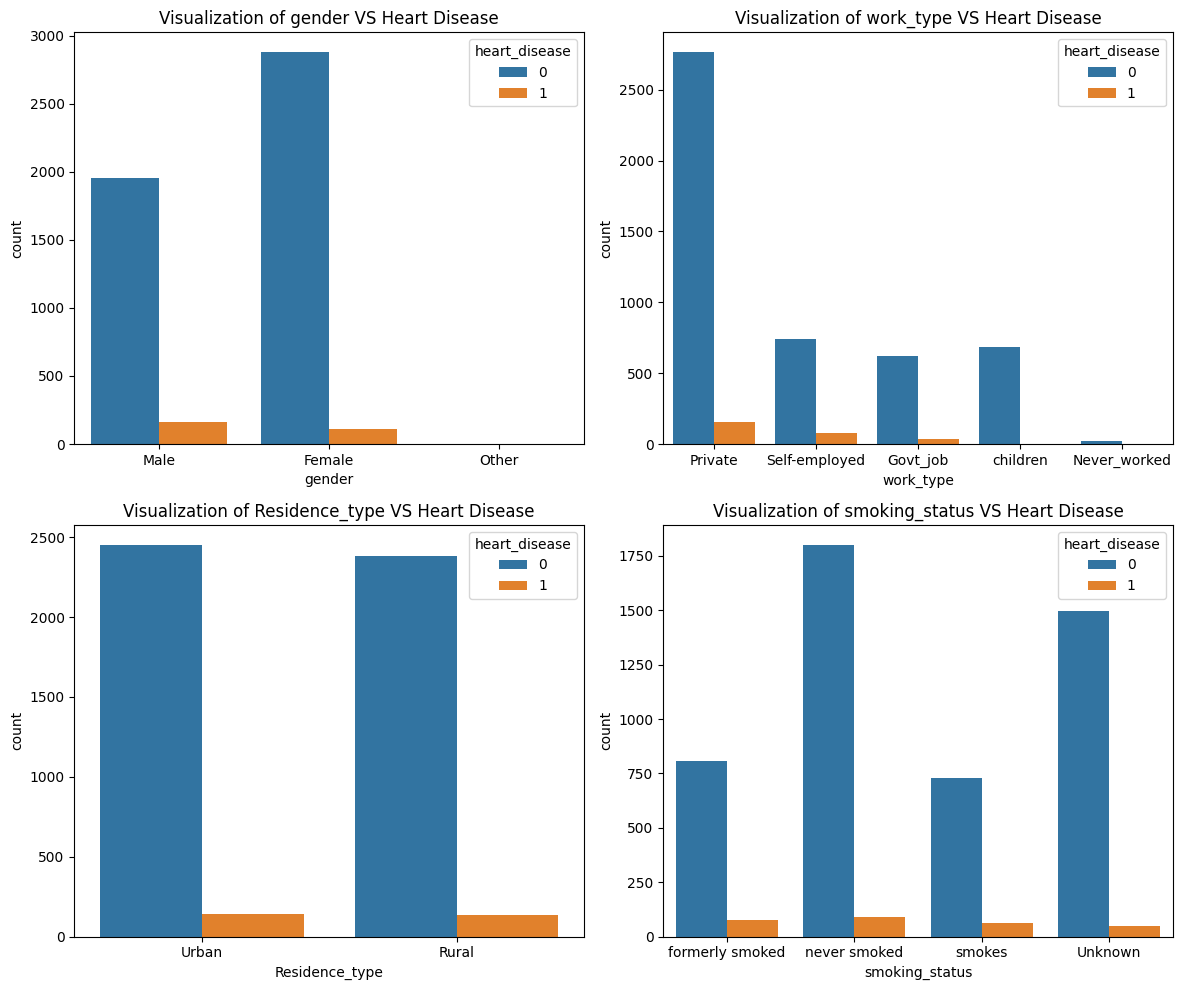

In [ ]:
fig, axs=plt.subplots(2,2 , figsize=(12,10))
axs=axs.flatten()
for i, feature in enumerate(Patient_status):
    sns.countplot(data=Data, x=feature, hue='heart_disease', ax=axs[i])
    axs[i].set_title(f'Visualization of {feature} VS Heart Disease')
    axs[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

### Heatmap of Correlations Among Numerical Feature

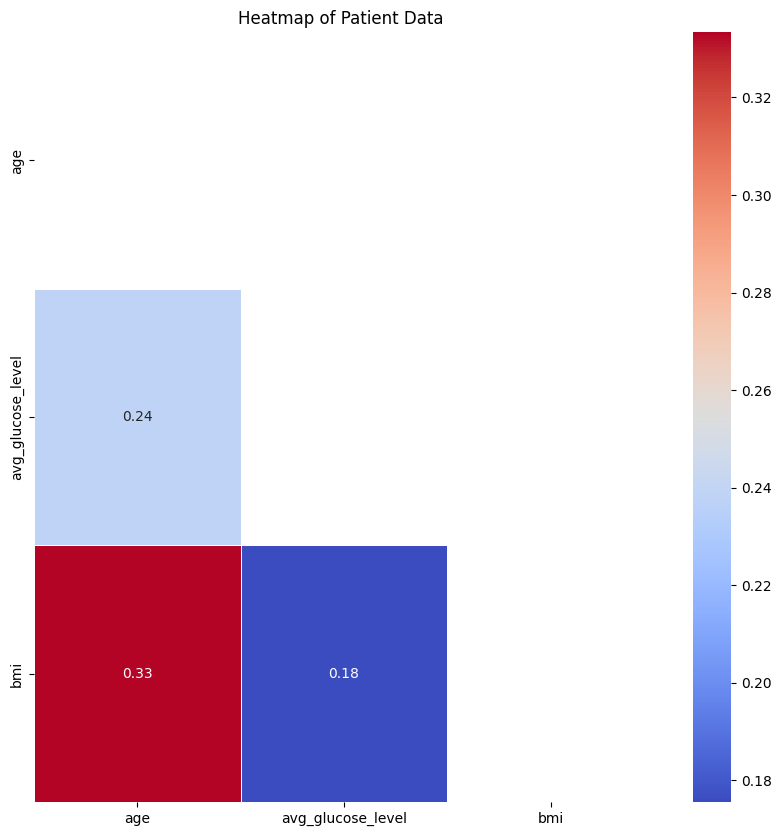

In [ ]:
Num_column=Data[['age','avg_glucose_level','bmi']]
corr_num=Num_column.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Patient Data ')
plt.show()

# Preprocessing

## Drop Irrelevant Columns

In [ ]:
Data=Data.drop(columns='id', axis=1)

## Missing Value Handling

In [ ]:
Data['bmi']=Data['bmi'].fillna(Data['bmi'].median())

In [ ]:
Data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Mismatch Value Handling

In [ ]:
Data=Data[Data['gender'] !='Other']

## Encode

In [ ]:
Gender_encode={
    'Male':0,
    'Female':1
}
ever_married_encode={
    'Yes':0,
    'No':1
}
work_type_encode={
    'Private':0,
    'Self-employed':1,
    'children':2,
    'Govt_job':3,
    'Never_worked':4
}
Resident_encode={
    'Urban':0,
    'Rural':1
}
smoking_encode={
    'never smoked':0,
    'formerly smoked':1,
    'smokes':2,
    'Unknown':3
}


In [ ]:
Data['gender']=Data['gender'].map(Gender_encode)
Data['ever_married']=Data['ever_married'].map(ever_married_encode)
Data['Residence_type']=Data['Residence_type'].map(Resident_encode)
Data['smoking_status']=Data['smoking_status'].map(smoking_encode)
Data['work_type']=Data['work_type'].map(work_type_encode)

In [ ]:
Data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,1,1
1,1,61.0,0,0,0,1,1,202.21,28.1,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,0,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,0,1


## Normalization

In [ ]:
scaler=MinMaxScaler()
Data['age']=scaler.fit_transform(Data[['age']])
Data['avg_glucose_level']=scaler.fit_transform(Data[['avg_glucose_level']])
Data['bmi']=scaler.fit_transform(Data[['bmi']])
Data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.816895,0,1,0,0,0,0.801265,0.301260,1,1
1,1,0.743652,0,0,0,1,1,0.679023,0.203895,0,1
2,0,0.975586,0,1,0,0,1,0.234512,0.254296,0,1
3,1,0.597168,0,0,0,0,0,0.536008,0.276060,2,1
4,1,0.963379,1,0,0,1,1,0.549349,0.156930,0,1


## Train and Test Data Split

In [ ]:
X=Data.drop('stroke', axis=1)
y=Data['stroke']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train:{X_train.shape}, y_train:{y_train.shape} ")
print(f"Testing Data Shape: X_test{X_test.shape}, y_test:{y_test.shape}")

Training Data Shape: X_train:(4087, 10), y_train:(4087,) 
Testing Data Shape: X_test(1022, 10), y_test:(1022,)


## Oversample Target Column in Train Data

In [ ]:
train_df=X_train.copy()
train_df['stroke']=y_train

stroke_majority=train_df[train_df['stroke']==0]
stroke_minority=train_df[train_df['stroke']==1]

stroke_minority_oversample=resample(
    stroke_minority,
    replace=True,
    n_samples=len(stroke_majority),
    random_state=42
)

train_balanced=pd.concat([stroke_majority, stroke_minority_oversample])
train_balanced=train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train=train_balanced.drop(columns=['stroke'])
y_train=train_balanced['stroke']

# Modelling

## Logistic Regression

### Score Metric

In [ ]:
LR=LogisticRegression().fit(X_train, y_train)

eval_train_LR=LR.predict(X_train)
eval_test_LR=LR.predict(X_test)

acc_lr=accuracy_score(y_test, eval_test_LR)
precision_lr=precision_score(y_test, eval_test_LR)
recall_lr=recall_score(y_test, eval_test_LR)
f1_lr=f1_score(y_test, eval_test_LR)

In [ ]:
result=({
    'Accuracy':[acc_lr],
    'Precision':[precision_lr],
    'Recall':[recall_lr],
    'F1 Score':[f1_lr]
})
result_df=pd.DataFrame(result, index=['Logistic regression'])
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train,eval_train_LR))

print("="*50)

print('Test Data')
print(classification_report(y_test, eval_test_LR))

Training Data
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3900
           1       0.76      0.82      0.79      3900

    accuracy                           0.78      7800
   macro avg       0.78      0.78      0.78      7800
weighted avg       0.78      0.78      0.78      7800

Test Data
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.79      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022



### Confusion Matrix

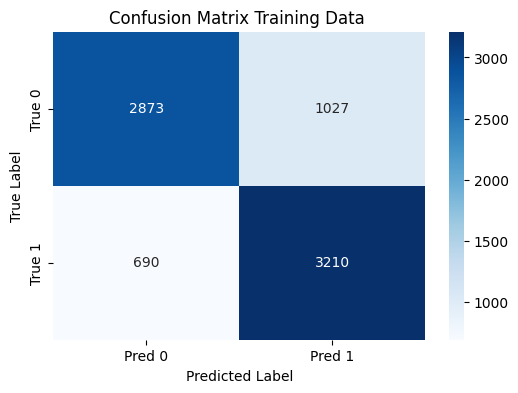

In [ ]:
cm_train_LR=confusion_matrix(y_train, eval_train_LR)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data ')
plt.show()

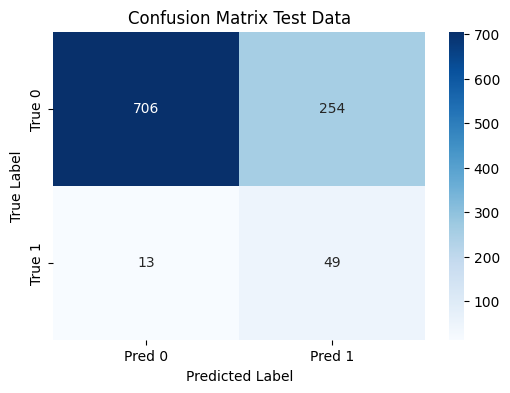

In [ ]:
cm_test_LR=confusion_matrix(y_test, eval_test_LR)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Random Forest

### Score Metric

In [ ]:
RF=RandomForestClassifier().fit(X_train, y_train)
eval_train_rf=RF.predict(X_train)
eval_test_rf=RF.predict(X_test)

acc_rf=accuracy_score(y_test, eval_test_rf)
precision_rf=precision_score(y_test, eval_test_rf)
recall_rf=recall_score(y_test, eval_test_rf)
f1_rf=f1_score(y_test, eval_test_rf)


In [ ]:
result_df.loc['Random Forest']=[acc_rf, precision_rf, recall_rf, f1_rf]
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493
Random Forest,0.936399,0.200000,0.016129,0.029851


### Classification Report

In [ ]:
print('Training Data ')
print(classification_report(y_train, eval_train_rf))

print("="*50)
print('Test Data')
print(classification_report(y_test, eval_test_rf))

Training Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00      3900

    accuracy                           1.00      7800
   macro avg       1.00      1.00      1.00      7800
weighted avg       1.00      1.00      1.00      7800

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



### Confusion Matrix

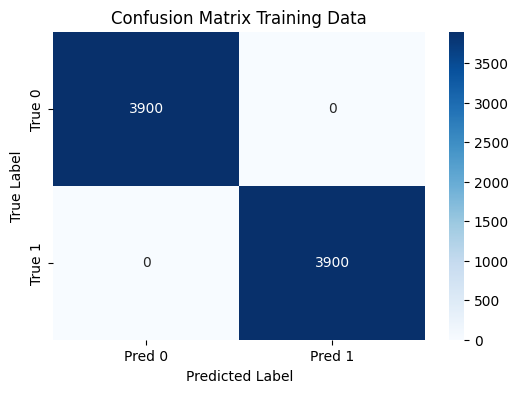

In [ ]:
cm_train_rf=confusion_matrix(y_train, eval_train_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

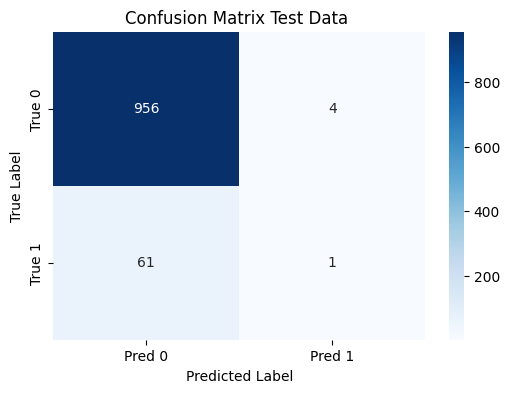

In [ ]:
cm_test_rf=confusion_matrix(y_test, eval_test_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data ')
plt.show()

## Decision Tree

### Score Metric

In [ ]:
DT=DecisionTreeClassifier().fit(X_train, y_train)
eval_train_dt=DT.predict(X_train)
eval_test_dt=DT.predict(X_test)

acc_dt=accuracy_score(y_test, eval_test_dt)
precision_dt=precision_score(y_test, eval_test_dt)
recall_dt=recall_score(y_test, eval_test_dt)
f1_dt=f1_score(y_test, eval_test_dt)

In [ ]:
result_df.loc['Decision Tree']=[acc_dt, precision_dt,recall_dt, f1_dt ]
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493
Random Forest,0.936399,0.200000,0.016129,0.029851
Decision Tree,0.916830,0.189189,0.112903,0.141414


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_dt))

print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_dt))

Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00      3900

    accuracy                           1.00      7800
   macro avg       1.00      1.00      1.00      7800
weighted avg       1.00      1.00      1.00      7800

Test Data
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.19      0.11      0.14        62

    accuracy                           0.92      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.90      0.92      0.91      1022



### Confusion Matrix

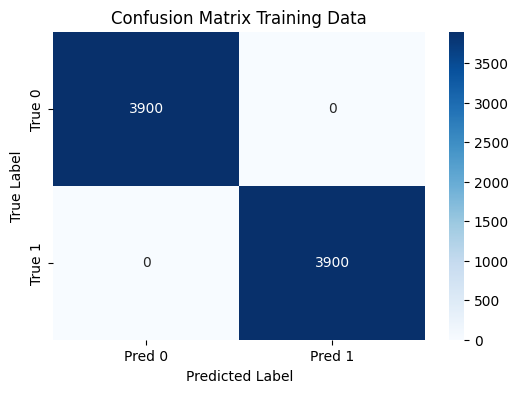

In [ ]:
cm_train_dt=confusion_matrix(y_train, eval_train_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'],yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

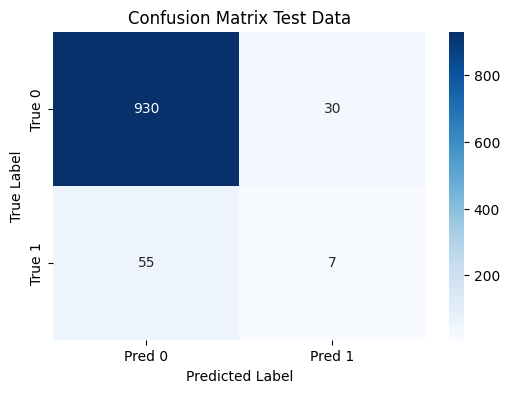

In [ ]:
cm_test_dt=confusion_matrix(y_test, eval_test_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## SVM

### Score Metric

In [ ]:
SVM=SVC().fit(X_train, y_train)
eval_train_svm=SVM.predict(X_train)
eval_test_svm=SVM.predict(X_test)

acc_svm=accuracy_score(y_test, eval_test_svm)
precision_svm=precision_score(y_test, eval_test_svm)
recall_svm=recall_score(y_test, eval_test_svm)
f1_svm=f1_score(y_test, eval_test_svm)

In [ ]:
result_df.loc['SVM']=[acc_svm, precision_svm, recall_svm, f1_svm]
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493
Random Forest,0.936399,0.200000,0.016129,0.029851
Decision Tree,0.916830,0.189189,0.112903,0.141414
SVM,0.728963,0.152104,0.758065,0.253369


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_svm))

print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_svm))

Training Data
              precision    recall  f1-score   support

           0       0.83      0.74      0.79      3900
           1       0.77      0.85      0.81      3900

    accuracy                           0.80      7800
   macro avg       0.80      0.80      0.80      7800
weighted avg       0.80      0.80      0.80      7800

Test Data
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       960
           1       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022



### Confusion Matrix

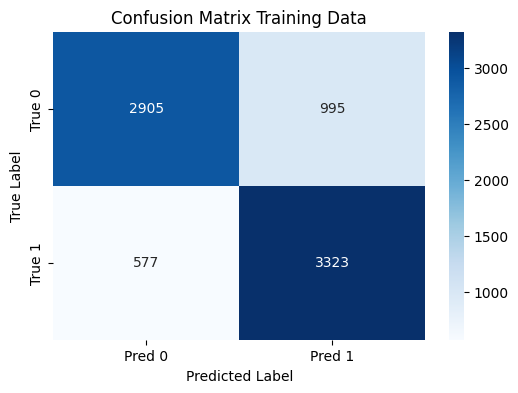

In [ ]:
cm_train_svm=confusion_matrix(y_train, eval_train_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_svm, annot=True,cmap='Blues', fmt='d', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

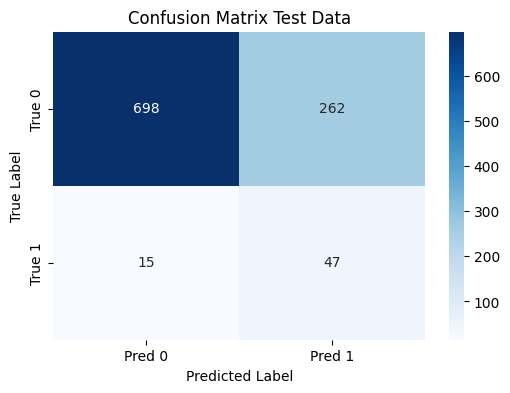

In [ ]:
cm_test_svm=confusion_matrix(y_test, eval_test_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_svm, annot=True, fmt='d',cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

# Hypertune Parameter

## Hypertune Parameter Logistic Regression

In [ ]:
param_grid_lr={
    'C':[0.0001, 0.001, 0.01, 0.1, 1,10, 100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}

grid_search=GridSearchCV(LR,param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Params',grid_search.best_params_)
print('Best Score:',grid_search.best_score_)



Best Params {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8449700854700855


## Hypertune Parameter in SVM

In [ ]:
param_grid_svm={
    'C':[0.1, 1, 10, 100],
    'kernel':['linear', 'rbf'],
    'gamma':['scale',0.1, 1, 10],

}

grid_search=GridSearchCV(
    SVM,
    param_grid_svm,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Best Params:',grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Params: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Best Score: 0.9745811965811966


## Logistic Regression (After Hypertune Parameter)

In [ ]:
LR1=LogisticRegression(C=1, penalty='l2', solver='liblinear').fit(X_train, y_train)
eval_train_lr1=LR1.predict(X_train)
eval_test_lr1= LR1.predict(X_test)

acc_lr1=accuracy_score(y_test, eval_test_lr1)
precision_lr1=precision_score(y_test, eval_test_lr1)
recall_lr1=recall_score(y_test, eval_test_lr1)
f1_lr1= f1_score(y_test, eval_test_lr1)

In [ ]:
result_df.loc['Logistic Regression (After Hypertune Parameter)']=[acc_lr1, precision_lr1, recall_lr1, f1_lr1]
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493
Random Forest,0.936399,0.200000,0.016129,0.029851
Decision Tree,0.916830,0.189189,0.112903,0.141414
SVM,0.728963,0.152104,0.758065,0.253369
Logistic Regression (After Hypertune Parameter),0.736791,0.160656,0.790323,0.267030


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_lr1))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_test_lr1))

Training Data
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3900
           1       0.76      0.82      0.78      3900

    accuracy                           0.78      7800
   macro avg       0.78      0.78      0.78      7800
weighted avg       0.78      0.78      0.78      7800

Test Data
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.79      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.80      1022



### Confusion Matrix

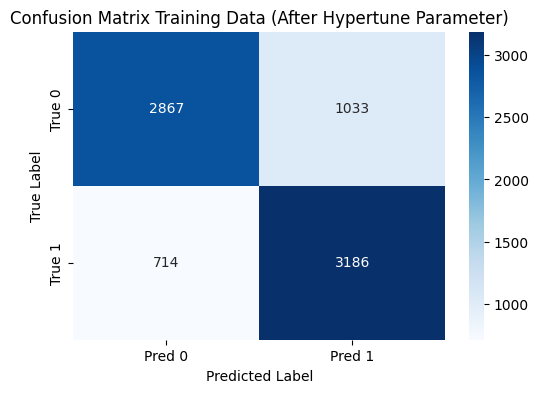

In [ ]:
cm_train_lr1=confusion_matrix(y_train, eval_train_lr1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_lr1, annot=True, fmt='d',cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data (After Hypertune Parameter)')
plt.show()

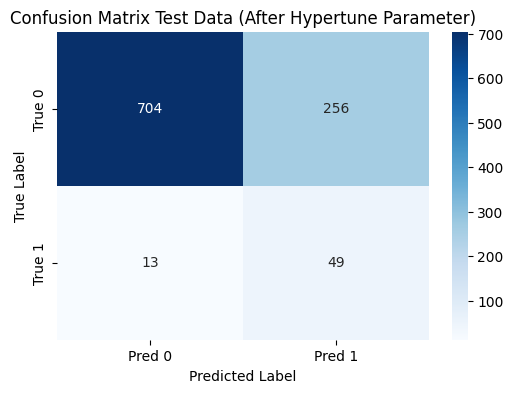

In [ ]:
cm_test_lr1=confusion_matrix(y_test, eval_test_lr1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lr1, annot=True,cmap='Blues', fmt='d', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data (After Hypertune Parameter)')
plt.show()

## SVM (After Hypertune Parameter)

### Score Metric

In [ ]:
SVM1=SVC(C=10, gamma=10, kernel='rbf').fit(X_train, y_train)
eval_svm1_train=SVM1.predict(X_train)
eval_svm1_test=SVM1.predict(X_test)

acc_svm1= accuracy_score(y_test, eval_svm1_test)
precision_svm1= precision_score(y_test, eval_svm1_test)
recall_svm1= recall_score(y_test, eval_svm1_test)
f1_svm1= f1_score(y_test, eval_svm1_test)

In [ ]:
result_df.loc['SVM (After Hypertune Parameter)']=[acc_svm1, precision_svm1, recall_svm1, f1_svm1]
result_df

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.738748,0.161716,0.790323,0.268493
Random Forest,0.936399,0.200000,0.016129,0.029851
Decision Tree,0.916830,0.189189,0.112903,0.141414
SVM,0.728963,0.152104,0.758065,0.253369
Logistic Regression (After Hypertune Parameter),0.736791,0.160656,0.790323,0.267030
SVM (After Hypertune Parameter),0.860078,0.106796,0.177419,0.133333


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_svm1_train))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_svm1_test))

Training Data
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3900
           1       0.96      1.00      0.98      3900

    accuracy                           0.98      7800
   macro avg       0.98      0.98      0.98      7800
weighted avg       0.98      0.98      0.98      7800

Test Data
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       960
           1       0.11      0.18      0.13        62

    accuracy                           0.86      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.89      0.86      0.88      1022



### Confusion Matrix

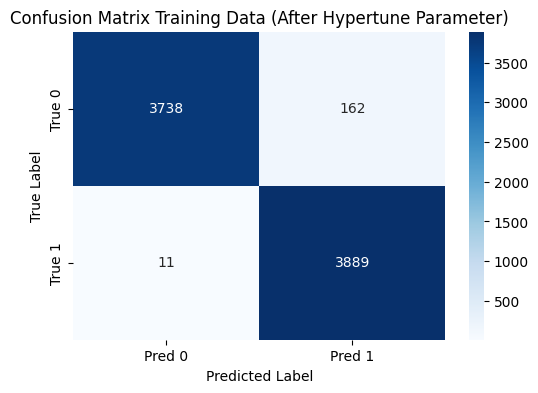

In [ ]:
cm_train_svm1=confusion_matrix(y_train, eval_svm1_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_svm1, annot=True,cmap='Blues', fmt='d', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data (After Hypertune Parameter)')
plt.show()

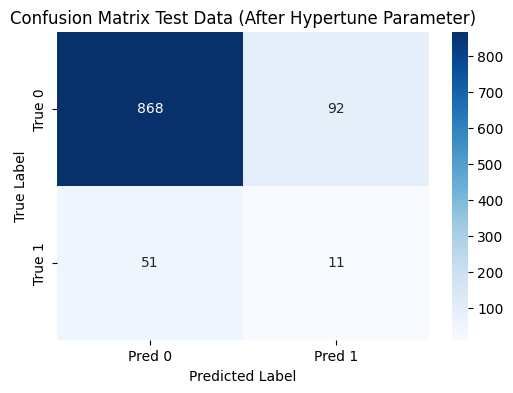

In [ ]:
cm_test_svm1=confusion_matrix(y_test, eval_svm1_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_svm1, annot=True, fmt='d',cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data (After Hypertune Parameter)')
plt.show()

In [ ]:
	Accuracy	Precision	Recall	F1 Score
Logistic regression	0.738748	0.161716	0.790323	0.268493
Random Forest	0.936399	0.200000	0.016129	0.029851
Decision Tree	0.916830	0.189189	0.112903	0.141414
SVM	0.728963	0.152104	0.758065	0.253369
Logistic Regression (After Hypertune Parameter)	0.736791	0.160656	0.790323	0.267030
SVM (After Hypertune Parameter)	0.860078	0.106796	0.177419	0.133333


### Conclusion

- The best model for stroke prediction is Logistic Regression, but Logistic Regression has an R2 score of 0.268493, which indicates that linear regression does not work well. However, Logistic Regression has a recall score than other models, so this model can be used for early prediction or screening  of stroke prediction.
- Random forest have high accuracy than other model but Random Forest have bad metrics in F1 Score